In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive
%cd MyDrive
%cd 'Colab Notebooks'

%cd ML\ in\ der\ Umformtechnik


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/ML in der Umformtechnik


In [ ]:
%ls

cnn_mnist_model.pth  codes/  data/  denoising_autoencoder.pth  Real-Datensatz/


In [ ]:
%cd codes/Autoencoders_TimeSeriesAnomalyDetection

/content/drive/MyDrive/Colab Notebooks/ML in der Umformtechnik/codes/Autoencoders_TimeSeriesAnomalyDetection


In [ ]:
%ls

broken_csvs/  common_IDs_ori.csv  LSTM_TIMESTEP200_model.h5  LSTM_TIMESTEP50_model.keras  src/
common_csvs/  LICENSE             LSTM_TIMESTEP50_model.h5   README.md


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

np.random.seed(1) # keras gets its source of randomness from the NumPy random number generator, for reproducible results
tf.random.set_seed(1)

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed, Flatten

In [ ]:
common_IDs= pd.read_csv('./common_IDs_ori.csv')
print(common_IDs)

       0
0      1
1     10
2     11
3    110
4    112
..   ...
260   79
261    8
262   81
263   82
264    9

[265 rows x 1 columns]


In [ ]:
# convert the string elements of common_IDs to integers
common_IDs = common_IDs.astype(int)
# print(common_IDs)
# sort the IDs in ascending order
common_IDs = common_IDs.sort_values(by=['0'])
# print(common_IDs)
# reset the index
common_IDs = common_IDs.reset_index(drop=True)
print(common_IDs)



       0
0      1
1      3
2      4
3      5
4      6
..   ...
260  511
261  513
262  514
263  516
264  518

[265 rows x 1 columns]


In [ ]:
# only choose ID between 230 and 515
common_IDs = common_IDs[(common_IDs['0'] >= 230) & (common_IDs['0'] <= 515)]

In [ ]:
# reset the index
common_IDs = common_IDs.reset_index(drop=True)
print(common_IDs)

       0
0    230
1    231
2    233
3    234
4    235
..   ...
198  509
199  510
200  511
201  513
202  514

[203 rows x 1 columns]


In [ ]:
csv_paths = './common_csvs'
# create an empty dataframe with the column name 'Force'
train_samples = pd.DataFrame(columns=['Time', 'Force'])
last_time = 0
# for each ID in common_IDs, read the corresponding csv file and append it to train_samples
for i in range(len(common_IDs)):
    df_temp = pd.read_csv(csv_paths + '/' + str(common_IDs['0'][i]) + '.csv')
    # print(df_temp)
    #only take first 200 rows of each csv file
    df_temp = df_temp.iloc[:200]
    # only keep the Force column
    df_temp = df_temp[['Time', 'Force']]
    scaler = StandardScaler()
    df_temp['Force'] = scaler.fit_transform(df_temp[['Force']])
    # register the last timestamp of the previous csv file
    df_temp['Time'] = df_temp['Time'] + last_time
    last_time = df_temp['Time'].iloc[-1]

    # take the data from the dataframe and append it to train_samples
    train_samples = train_samples.append(df_temp, ignore_index=True)
# print(df)

print(train_samples)


<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

           Time     Force
0         0.000 -0.539336
1         0.056 -0.584105
2         0.083 -0.557238
3         0.131 -0.557238
4         0.182 -0.566176
...         ...       ...
40595  2020.457 -0.567134
40596  2020.514 -0.575686
40597  2020.556 -0.558556
40598  2020.609 -0.567134
40599  2020.660 -0.549978

[40600 rows x 2 columns]


<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-41-f2dccba38869>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [ ]:
csv_paths = './broken_csvs'
# create a big daraframe to save data from all csv files
# create a data frame to save some broken IDs with a column called '0'
broken_IDs = pd.DataFrame(columns=['0'])
# 205, 297, 311, 520, 521 are broken IDs
broken_IDs = broken_IDs.append({'0':205}, ignore_index=True)
broken_IDs = broken_IDs.append({'0':297}, ignore_index=True)
broken_IDs = broken_IDs.append({'0':10}, ignore_index=True)
broken_IDs = broken_IDs.append({'0':311}, ignore_index=True)
broken_IDs = broken_IDs.append({'0':12}, ignore_index=True)
broken_IDs = broken_IDs.append({'0':520}, ignore_index=True)
broken_IDs = broken_IDs.append({'0':521}, ignore_index=True)
broken_IDs = broken_IDs.append({'0':15}, ignore_index=True)
print(broken_IDs)
# convert the string elements of common_IDs to integers
broken_IDs = broken_IDs.astype(int)
last_time = 0
test_samples = pd.DataFrame(columns=['Time', 'Force'])
# for each ID in common_IDs, read the corresponding csv file and append it to train_samples
for i in range(len(broken_IDs)):
    df_temp = pd.read_csv(csv_paths + '/' + str(broken_IDs['0'][i]) + '.csv')
    # print(df_temp)
    #only take first 200 rows of each csv file
    df_temp = df_temp.iloc[:200]
    # only keep the Force column
    df_temp = df_temp[['Time', 'Force']]
    scaler = StandardScaler()
    df_temp['Force'] = scaler.fit_transform(df_temp[['Force']])
    # register the last timestamp of the previous csv file
    df_temp['Time'] = df_temp['Time'] + last_time
    last_time = df_temp['Time'].iloc[-1]

    # take the data from the dataframe and append it to train_samples
    test_samples = test_samples.append(df_temp, ignore_index=True)

print(test_samples)


     0
0  205
1  297
2   10
3  311
4   12
5  520
6  521
7   15
        Time     Force
0      0.000 -0.681396
1      0.075 -0.681396
2      0.122 -0.681396
3      0.424 -0.642504
4      0.443 -0.603611
...      ...       ...
1595  81.906 -0.480825
1596  81.963 -0.480825
1597  82.013 -0.469306
1598  82.062 -0.492378
1599  82.116 -0.492378

[1600 rows x 2 columns]


<ipython-input-42-10b6278a0f82>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-42-10b6278a0f82>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-42-10b6278a0f82>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-42-10b6278a0f82>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-42-10b6278a0f82>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-42-10b6278a0f82>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [ ]:
# # Create sequences
# TIME_STEPS = 200  # Adjust this value as necessary

# def create_sequences(X, y, time_steps=TIME_STEPS):
#     Xs, ys = [], []
#     for i in range(len(X)-time_steps):
#         Xs.append(X.iloc[i:(i+time_steps)].values)
#         ys.append(y.iloc[i+time_steps])

#     return np.array(Xs), np.array(ys)

# X_train, y_train = create_sequences(train_samples[['Force']], train_samples['Force'])
# X_test, y_test = create_sequences(test_samples[['Force']], test_samples['Force'])


In [ ]:
# # Create sequences
# TIME_STEPS = 50  # Adjust this value as necessary

# def create_sequences(X, y, time_steps=TIME_STEPS):
#     Xs, ys = [], []
#     for i in range(len(X)-time_steps):
#         Xs.append(X.iloc[i:(i+time_steps)].values)
#         ys.append(y.iloc[i+time_steps])

#     return np.array(Xs), np.array(ys)

# X_train, y_train = create_sequences(train_samples[['Force']], train_samples['Force'])
# X_test, y_test = create_sequences(test_samples[['Force']], test_samples['Force'])


In [ ]:
# Create sequences
TIME_STEPS = 25  # Adjust this value as necessary

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])

    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(train_samples[['Force']], train_samples['Force'])
X_test, y_test = create_sequences(test_samples[['Force']], test_samples['Force'])


In [ ]:

# # Build the LSTM autoencoder model
# model = Sequential()
# model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(RepeatVector(X_train.shape[1]))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(TimeDistributed(Dense(X_train.shape[2])))
# model.compile(optimizer='adam', loss='mae')

# Build a more complex LSTM autoencoder model
model = Sequential()

# Encoder
model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(64))
model.add(Dropout(0.4))

# Connector
model.add(RepeatVector(X_train.shape[1]))

# Decoder
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.4))
model.add(TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')

# Train the model
history = model.fit(X_train, X_train, epochs=100, batch_size=1024, validation_split=0.1, shuffle=False)



Epoch 1/100
36/36 [==============================] - 13s 133ms/step - loss: 0.3904 - val_loss: 0.2456
Epoch 2/100
36/36 [==============================] - 3s 75ms/step - loss: 0.2493 - val_loss: 0.1890
Epoch 3/100
36/36 [==============================] - 3s 75ms/step - loss: 0.1784 - val_loss: 0.1327
Epoch 4/100
36/36 [==============================] - 3s 76ms/step - loss: 0.1435 - val_loss: 0.1002
Epoch 5/100
36/36 [==============================] - 3s 76ms/step - loss: 0.1224 - val_loss: 0.0789
Epoch 6/100
36/36 [==============================] - 3s 76ms/step - loss: 0.1117 - val_loss: 0.0700
Epoch 7/100
36/36 [==============================] - 3s 77ms/step - loss: 0.1047 - val_loss: 0.0736
Epoch 8/100
36/36 [==============================] - 3s 77ms/step - loss: 0.1024 - val_loss: 0.0751
Epoch 9/100
36/36 [==============================] - 3s 78ms/step - loss: 0.0980 - val_loss: 0.0624
Epoch 10/100
36/36 [==============================] - 3s 78ms/step - loss: 0.0930 - val_loss: 0.06

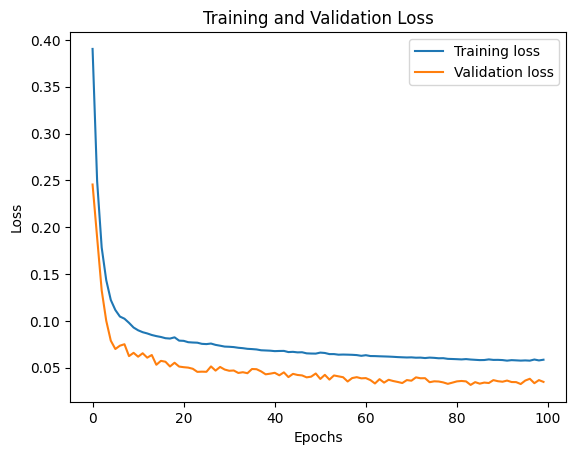

50/50 [==============================] - 0s 7ms/step - loss: 0.2130


0.21296291053295135

In [ ]:
import matplotlib.pyplot as plt

# Your existing code to plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Add labels and title if desired
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Save the plot to a file
plt.savefig('loss_plot.png')  # Saves the plot as a PNG file
# You can specify a different file format, like 'loss_plot.jpg' or 'loss_plot.pdf'

plt.show()  # This will display the plot


model.evaluate(X_test, X_test)

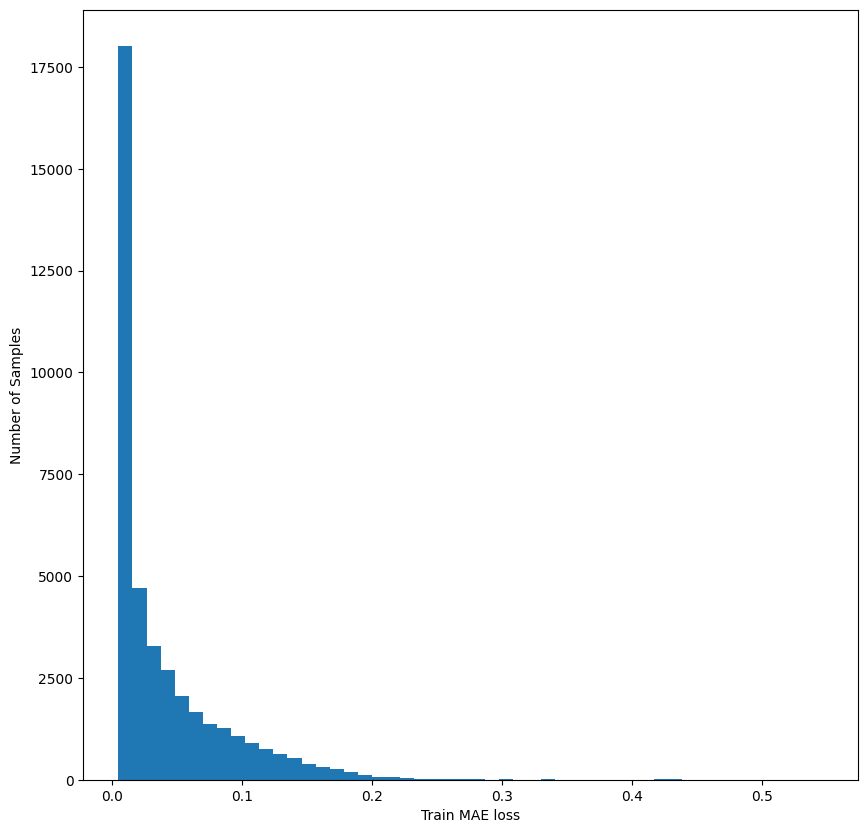

In [ ]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.figure(figsize=(10,10))
plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');
plt.show()


Reconstruction error threshold: 0.30378722230392136


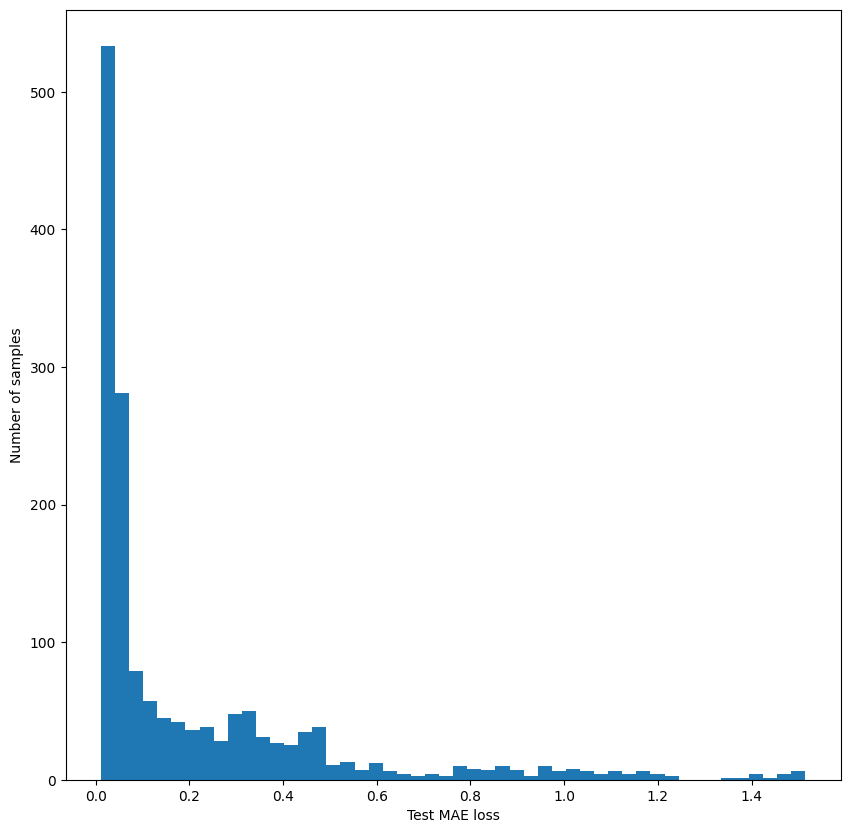

In [ ]:

# threshold = np.percentile(train_mae_loss,85) #We can't assume that all training data is normal, otherwise model is flawed
threshold = np.percentile(train_mae_loss, 99.8)

# threshold = np.max(train_mae_loss)

print(f'Reconstruction error threshold: {threshold}')

X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.figure(figsize=(10,10))
plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')
plt.show()


In [ ]:

test_score_df = pd.DataFrame(test_samples[TIME_STEPS:])
print(test_score_df)

        Time     Force
25     1.962 -0.642504
26     2.012 -0.642504
27     2.075 -0.681396
28     2.112 -0.623028
29     2.162 -0.681396
...      ...       ...
1595  81.906 -0.480825
1596  81.963 -0.480825
1597  82.013 -0.469306
1598  82.062 -0.492378
1599  82.116 -0.492378

[1575 rows x 2 columns]


In [ ]:
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['Force'] = test_samples[TIME_STEPS:]['Force']

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_score_df['Time'], y=test_score_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=test_score_df['Time'], y=test_score_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()
anomalies = test_score_df.loc[test_score_df['anomaly'] == True]


In [ ]:
# anomalies = test_score_df.loc[test_score_df['anomaly'] == True]
anomalies.shape

(406, 5)

In [ ]:
import plotly.graph_objects as go

# Your existing code for creating the figure and adding traces
fig = go.Figure()

# Reshape and inverse transform
force_original = scaler.inverse_transform(test_score_df['Force'].values.reshape(-1, 1)).flatten()
anomaly_original = scaler.inverse_transform(anomalies['Force'].values.reshape(-1, 1)).flatten()

fig.add_trace(go.Scatter(x=test_score_df['Time'], y=force_original, name='Force'))
fig.add_trace(go.Scatter(x=anomalies['Time'], y=anomaly_original, mode='markers', name='Anomaly'))

# Update layout for axis labels and centering the title
fig.update_layout(
    showlegend=True,
    title={
        'text': 'Detected Anomalies',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Time (s)',  # Set x-axis label
    yaxis_title='Force (N)'  # Set y-axis label
)

# Show the plot
fig.show()


In [ ]:
# # Save the entire model
# model_path = "./LSTM_TIMESTEP200_model.h5"
# model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
# # Save the entire model
# model_path = "./LSTM_TIMESTEP50_model.keras"
# model.save(model_path)

In [ ]:
# Save the entire model
model_path = "./LSTM_TIMESTEP25_Best_model.keras"
model.save(model_path)

In [ ]:
# Save the entire model
model_path = "./LSTM_TIMESTEP25_Best_model_validzone.keras"
model.save(model_path)